# Pymaceuticals Analysis

- Pymaceuticals is a company that specializes in anti-cancer medications.
- There was a **mice study**. 249 mice who had squamous cell carcinoma (SCC) tumors received drug treatment
- Tumor development was tracked & measured over 45 days.
- **Study compared performance of Capomulin to other treatment regimens**

- Our task is to generate all the tables and figures needed for the technical report of the clinical study. We also should generate a top-level summary of the study results. 

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Preparing the Data

In [2]:
# reading in data
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
# merging the data based on 'Mouse ID'
study_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
study_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [7]:
# check number of mice
number_mice_in_study = len(study_data['Mouse ID'].unique())
number_mice_in_study

249

In [8]:
# checking for any Mouse ID with duplicate time points
duplicated_ID_timepoint_data = study_data[study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_ID_timepoint_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# showing all the data for the duplicated Mouse IDs 
dup_mouse_data = study_data.loc[study_data['Mouse ID']=='g989']
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# dropping duplicated mouse's observations from dataframe
clean_study_data = study_data.loc[study_data['Mouse ID']!='g989']
print(len(clean_study_data['Mouse ID'].unique()))

248


# Summary Statistics

In [11]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# generating mean of tumor volume for each drug regimen
mean_tumor_vol = clean_study_data.groupby(['Drug Regimen']).mean(numeric_only=True)['Tumor Volume (mm3)']

# generating median of tumor volume for each drug regimen
med_tumor_vol = clean_study_data.groupby(['Drug Regimen']).median(numeric_only=True)['Tumor Volume (mm3)']

# generating variance of tumor volume for each drug regimen
#drug_groupby = clean_study_data.groupby(['Drug Regimen'])
var_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.var)['Tumor Volume (mm3)']

#s2_tumor_volume = np.std(drug_groupby)
std_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.std)['Tumor Volume (mm3)']

# SEM of tumor volume
sem_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(st.sem)['Tumor Volume (mm3)']

# assemble series into dataframe
summary_stats_tumor_vol = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                                        "Median Tumor Volume": med_tumor_vol,
                                        "Tumor Volume Variance": var_tumor_vol,
                                        "Tumor Volume Std. Dev.": std_tumor_vol,
                                        "Tumor Volume Std. Err.": sem_tumor_vol})

summary_stats_tumor_vol

C:\Users\speer\AppData\Local\Temp\ipykernel_8196\4053990284.py:15: FutureWarning: The operation <function var at 0x000001848BFF04C0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  var_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.var)['Tumor Volume (mm3)']
C:\Users\speer\AppData\Local\Temp\ipykernel_8196\4053990284.py:18: FutureWarning: The operation <function std at 0x000001848BFF0310> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  std_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.std)['Tumor Volume (mm3)']
C:\Users\speer\AppData\Local\Temp\ipykernel_8196\4053990284.py:21: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


summary_stats_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(['mean', 'median', np.var, np.std, st.sem])['Tumor Volume (mm3)']
summary_stats_tumor_vol.rename(columns={"mean": 'Mean Tumor Volume',
                                        "median": 'Median Tumor Volume',
                                        'var': 'Tumor Volume Variance',
                                        'std': 'Tumor Volume Std. Dev.',
                                        'sem': 'Tumor Volume Std. Err.'})

C:\Users\speer\AppData\Local\Temp\ipykernel_8196\1487721928.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(['mean', 'median', np.var, np.std, st.sem])['Tumor Volume (mm3)']


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts and Pie Charts

## Bar Charts

In [14]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


<Axes: title={'center': 'Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

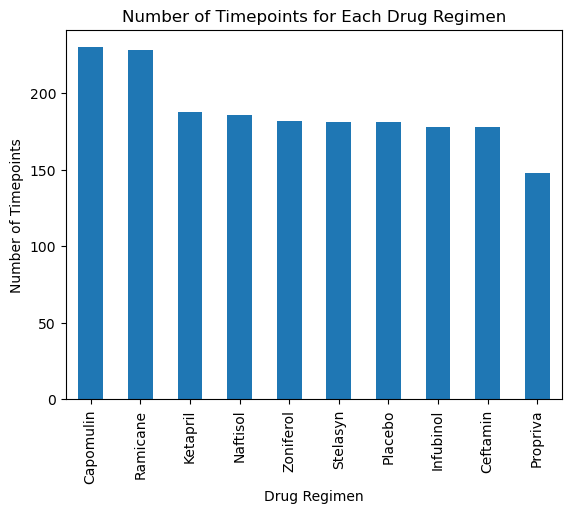

In [15]:
# pandas creation method 1 - .value_counts()
drug_regimen_timepoint_count = clean_study_data['Drug Regimen'].value_counts()
# create bar graph
drug_regimen_timepoint_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Timepoints',
                                  title='Number of Timepoints for Each Drug Regimen')

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64


<Axes: title={'center': 'Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

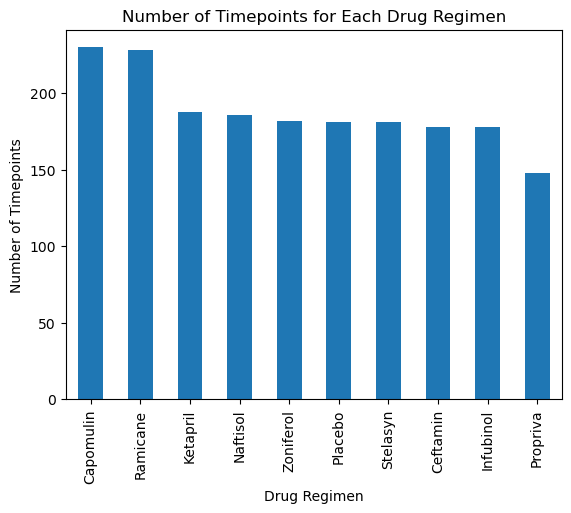

In [16]:
# pandas creation method 2 - .groupby()

# group counts of timepoints for each drug regimen
drug_regimen_timepoint_count = clean_study_data.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)
print(drug_regimen_timepoint_count)


# create bar graph
drug_regimen_timepoint_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Timepoints',
                                  title='Number of Timepoints for Each Drug Regimen')

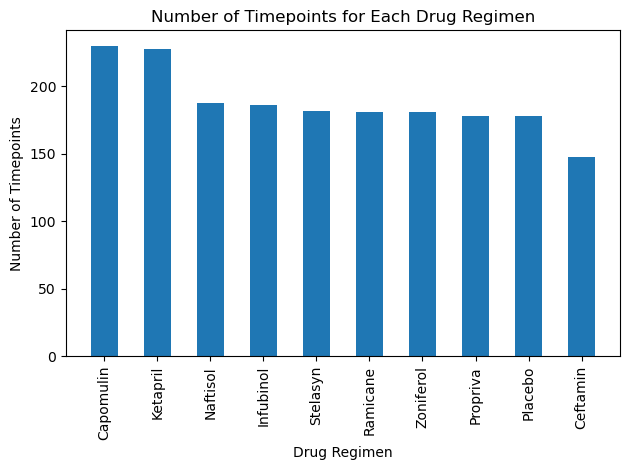

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(clean_study_data['Drug Regimen'].unique(), drug_regimen_timepoint_count, width=.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(clean_study_data['Drug Regimen'].unique(), rotation=90) #
plt.title('Number of Timepoints for Each Drug Regimen')
plt.tight_layout()

## Pie Charts

I'm going to do some more investigation of the accuracy of these charts AFTER finishing the assignment. Since we use timepoints to count the percentae of male and female mice, there could be some inaccuracy in these pie charts if either male or female mice were more likely to be in studies with less or more timepoints. 

In [18]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


Male      958
Female    922
Name: Sex, dtype: int64


<Axes: ylabel='Sex'>

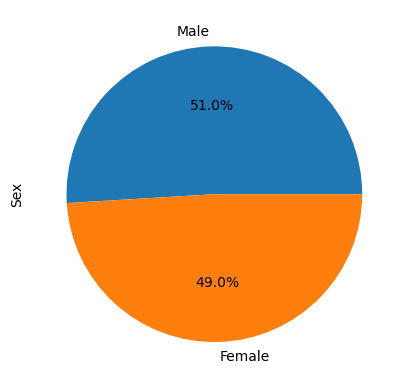

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse_count = clean_study_data['Sex'].value_counts()
print(gender_mouse_count)
gender_mouse_count.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')

Text(0, 0.5, 'Sex')

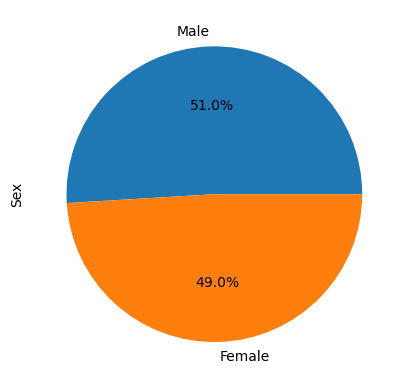

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mouse_count, labels=gender_mouse_count.index, autopct="%1.1f%%")
plt.ylabel('Sex')

# Quartiles, Outliers, and Boxplots

In [21]:
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_max_timepoint = clean_study_data.groupby(['Mouse ID']).agg('max')['Timepoint']
mice_max_timepoint = mice_max_timepoint.rename('Timepoint')
print(mice_max_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_timpoint_df = pd.merge(clean_study_data, mice_max_timepoint, how='right', on=['Mouse ID', 'Timepoint'])
merged_max_timpoint_df.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
treatment_num = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_vols = merged_max_timpoint_df.loc[merged_max_timpoint_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol.append(treatment_tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)

    # printing out potential outliers
    outliers = treatment_tumor_vols.loc[(treatment_tumor_vols>upper_bound)|(treatment_tumor_vols<lower_bound)]
    print(f"{treatment}'s has {len(outliers)} potential outliers: {outliers}")

    # increment treatment_num
    treatment_num += 1

Capomulin's has 0 potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's has 0 potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's has 1 potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's has 0 potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

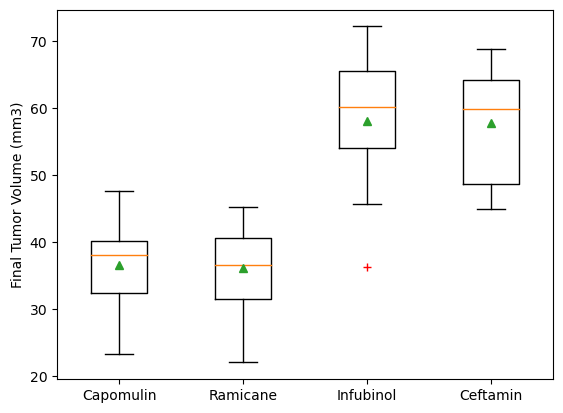

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(final_tumor_vol, sym='r+', labels=treatments, showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')


# Line Plot and Scatter Plots

In [33]:
clean_study_data.loc[clean_study_data['Mouse ID']=='l509'][['Timepoint', 'Tumor Volume (mm3)']]

,Timepoint,Tumor Volume (mm3)
231,0,45.000000
253,5,45.851193
539,10,46.759074
881,15,47.488599
982,20,48.070452
1146,25,44.006257
1414,30,44.708055
1499,35,40.207288
1723,40,40.770813
1771,45,41.483008


<Axes: title={'center': 'Tumor Volume over Time Mouse l509 (Capomulin Treatment)'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

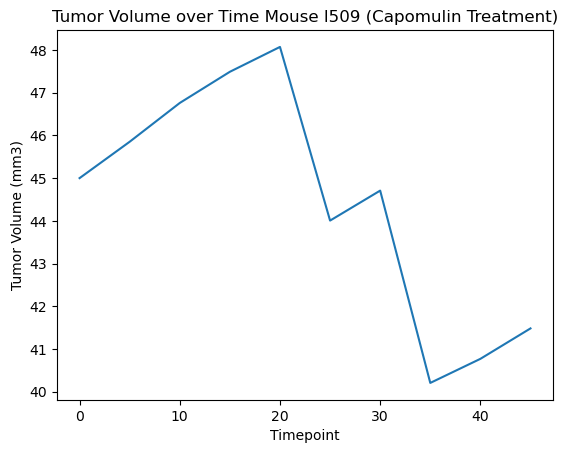

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

clean_study_data.loc[clean_study_data['Mouse ID']=='l509'][['Timepoint', 'Tumor Volume (mm3)']].plot(kind = 'line', 
                                                                                                     x='Timepoint',
                                                                                                     y='Tumor Volume (mm3)',
                                                                                                     ylabel='Tumor Volume (mm3)',
                                                                                                     title='Tumor Volume over Time Mouse l509 (Capomulin Treatment)',
                                                                                                     legend=False)

C:\Users\speer\AppData\Local\Temp\ipykernel_8196\1640933037.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomuline_avg_tumor_vol = capomulin_df.groupby(['Mouse ID']).agg('mean')['Tumor Volume (mm3)']
C:\Users\speer\AppData\Local\Temp\ipykernel_8196\1640933037.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_weight = capomulin_df.groupby(['Mouse ID']).agg('mean')['Weight (g)']


Text(0.5, 1.0, 'Average Tumor Volume (mm3) vs. Mouse Weight (g)')

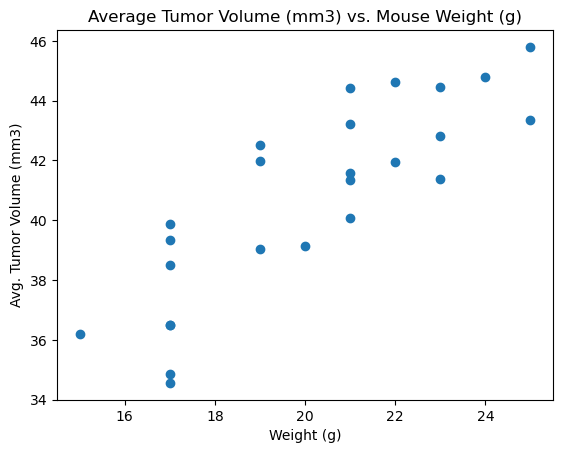

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
capomuline_avg_tumor_vol = capomulin_df.groupby(['Mouse ID']).agg('mean')['Tumor Volume (mm3)']
capomulin_weight = capomulin_df.groupby(['Mouse ID']).agg('mean')['Weight (g)']


plt.scatter(capomulin_weight, capomuline_avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')


# Correlation and Regression

Since the p-value (1e-07) is less than 0.05, we reject the null hypothesis. These two variables are correlated.
The correlation between mouse weight in grams and tumor volume in milimeters cubed is 0.842.


Text(0.5, 1.0, 'Average Tumor Volume (mm3) vs. Mouse Weight (g)')

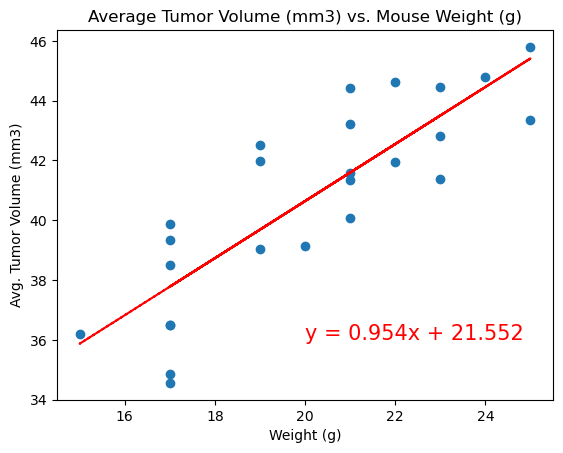

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculating Pearson's Correlation Coefficient
corr_coeff = st.pearsonr(capomulin_weight, capomuline_avg_tumor_vol)
print(f"Since the p-value ({round(corr_coeff[1],7)}) is less than 0.05, we reject the null hypothesis. These two variables are correlated.")
print(f"The correlation between mouse weight in grams and tumor volume in milimeters cubed is {round(corr_coeff[0],3)}.")

# Performing a linear regression
(m, b, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomuline_avg_tumor_vol)

## getting predicted values
y_pred = capomulin_weight * m + b

## defining the linear equation as string so we can annotate it onto the graph
lin_eq = f"y = {round(m,3)}x + {round(b,3)}"

# Plotting everying
plt.scatter(capomulin_weight, capomuline_avg_tumor_vol)
plt.plot(capomulin_weight, y_pred, linestyle='dashed', color='red')
plt.annotate(lin_eq, (20,36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')